In [1]:
import numpy as np
import pandas as pd
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
import pygmo as pg
import math

In [2]:
dataset = pd.read_csv("Ackley_dataset_data.csv")
Ackley_dataset = dataset["val"].tolist()

In [3]:
D = 50
f_bias = -140
lower_bound = -32
upper_bound = 32

In [4]:
def func(x):
    Sum1 = 0
    Sum2 = 0
    for i in range(D - 1):
        z = x[i] - Ackley_dataset[i]
        Sum1 += z ** 2
        Sum2 += math.cos(2 * math.pi * z)
    func = -20 * math.exp(-0.2 * math.sqrt(Sum1 / D)) - math.exp(Sum2 / D) + 20 + math.e + f_bias
    return func

In [5]:
class ACK:
    def __init__(self,xmin,xmax,D,f_bias):
        self.lower_bound = xmin
        self.upper_bound = xmax
        self.dimension = D
        self.fitness_per_eval = []
        self.glob_opt = f_bias

    def fitness(self, x):
        #result = abs(func(x)-f_bias)
        result = func(x)
        return [result]

    def get_bounds(self):
        x_min = self.lower_bound * np.ones(self.dimension)
        x_max = self.upper_bound * np.ones(self.dimension)
        return x_min, x_max

In [6]:
def compute(func):
    global curve
    global start_time
    global end_time
    start_time = time.time()
    algo = pg.algorithm(pg.simulated_annealing(Ts=20., Tf=1e-4))
    algo.set_verbosity(1)
    popsize = 1
    prob = pg.problem(ACK(lower_bound,upper_bound,D,f_bias))
    pop = pg.population(prob, popsize)
    extract_algo = algo.extract(pg.simulated_annealing)
    pop = algo.evolve(pop)
    end_time = time.time()
    
    log = extract_algo.get_log()
    curve = [x[2] for x in log]
    #niter = log[-1][0]
    niter = pop.problem.get_fevals()
    
    curve = [x[2] for x in log]
    print("Best position: ", pop.champion_x)
    print("Best Fitness",pop.champion_f[0])

In [7]:
compute(func)

Best position:  [ 27.0118549  -16.15260843   6.38264341  -0.91091015  23.49801786
  15.75377059  -2.75376122 -28.92779336  19.3396015   -3.32612397
   6.96448807  17.66054185  25.31290711  14.15187749 -19.5168767
  -5.46623219  26.1243192   24.9948275   -5.3117492   23.58930828
 -26.49439614  -8.45492928  18.78618352 -29.56267439 -21.53311546
 -17.81949525 -18.04545889   6.30638866 -13.3971262  -18.05130589
 -29.03851507  14.80836773  -3.33131841  25.95941675  -1.76005945
  -4.86775327  20.84581472   1.52415942 -17.83932902  10.48043777
  20.19983324 -28.79271856  10.74879832  -7.26034594  19.83155782
   0.19087278  12.56902684  -4.27612718 -11.73563944  -2.57067745]
Best Fitness -139.1186204788561


In [8]:
comp_time = end_time-start_time
comp_time

5.586615562438965

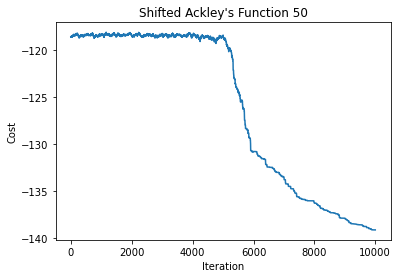

In [9]:
plt.plot(curve)
plt.title("Shifted Ackley's Function 50")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()